In [127]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

In [9]:
# metadata
print(bank_marketing.metadata['additional_info']['summary'], )

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict i

In [10]:
bank_marketing.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,None,no
1,job,Feature,Categorical,Occupation,"type of job (categorical: 'admin.','blue-colla...",None,no
2,marital,Feature,Categorical,Marital Status,"marital status (categorical: 'divorced','marri...",None,no
3,education,Feature,Categorical,Education Level,"(categorical: 'basic.4y','basic.6y','basic.9y'...",None,no
4,default,Feature,Binary,None,has credit in default?,None,no
5,balance,Feature,Integer,None,average yearly balance,euros,no
6,housing,Feature,Binary,None,has housing loan?,None,no
7,loan,Feature,Binary,None,has personal loan?,None,no
8,contact,Feature,Categorical,None,contact communication type (categorical: 'cell...,None,yes
9,day_of_week,Feature,Date,None,last contact day of the week,None,no


### EDA

In [11]:
type(X)

pandas.core.frame.DataFrame

In [12]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [19]:
y.rename(columns={'y': 'subscribed'},inplace=True)

y.head()

C:\Users\Himz\AppData\Local\Temp\ipykernel_16572\282211850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.rename(columns={'y': 'subscribed'},inplace=True)


,subscribed
0,no
1,no
2,no
3,no
4,no


In [20]:
# Let's see data distribution

y.subscribed.value_counts()

subscribed
no     39922
yes     5289
Name: count, dtype: int64

E:\core\miniconda3\envs\nlp\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\core\miniconda3\envs\nlp\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\core\miniconda3\envs\nlp\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


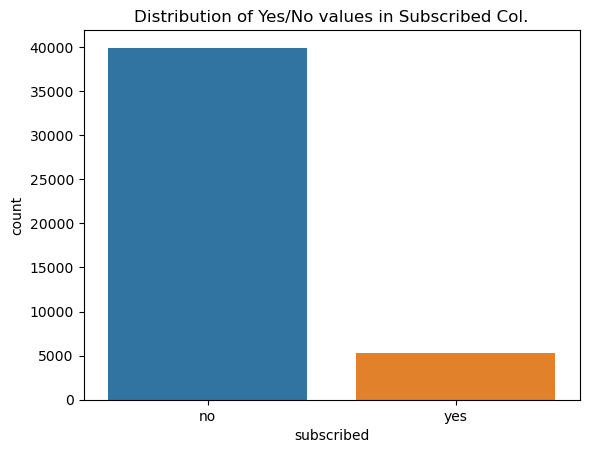

In [22]:
sns.countplot(x='subscribed', data=y)
plt.title('Distribution of Yes/No values in Subscribed Col.')
plt.show()

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [46]:
# Counting missing values
def count_missing_values(df:pd.DataFrame):
    """This function takes a dataframe and returns all columns having missing data along with their counts"""

    num_instances = df.shape[0]
    num_features = df.shape[1]
    print(f"Total Instances: {num_instances}")
    for col in df.columns:
        if df[col].isnull().sum() != 0:
            print(f"{col}: {df[col].isnull().sum()}")
        else:
            pass

In [47]:
count_missing_values(X)

Total Instances: 45211
job: 288
education: 1857
contact: 13020
poutcome: 36959


In [56]:
# Since contact and poutcome columns contain too much missing data, so dropping these columns

X = X.drop(columns=['contact', 'poutcome'])

In [61]:
# Imputing job and education column

def impute_mode(df, columns_list):
    for i in columns_list:
        print(f"Missing values before impute: {df[i].isnull().sum()}")
        df[i].fillna(df[i].mode()[0], inplace=True)
        print(f"Missing values after impute: {df[i].isnull().sum()}")

In [62]:
impute_mode(X, ['job', 'education'])

Missing values before impute: 288
Missing values after impute: 0
Missing values before impute: 1857
Missing values after impute: 0


In [69]:
# Looking for duplicated values

X.duplicated().sum()

0

In [107]:
bank_marketing.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,None,no
1,job,Feature,Categorical,Occupation,"type of job (categorical: 'admin.','blue-colla...",None,no
2,marital,Feature,Categorical,Marital Status,"marital status (categorical: 'divorced','marri...",None,no
3,education,Feature,Categorical,Education Level,"(categorical: 'basic.4y','basic.6y','basic.9y'...",None,no
4,default,Feature,Binary,None,has credit in default?,None,no
5,balance,Feature,Integer,None,average yearly balance,euros,no
6,housing,Feature,Binary,None,has housing loan?,None,no
7,loan,Feature,Binary,None,has personal loan?,None,no
8,contact,Feature,Categorical,None,contact communication type (categorical: 'cell...,None,yes
9,day_of_week,Feature,Date,None,last contact day of the week,None,no


### Visualization

E:\core\miniconda3\envs\nlp\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\core\miniconda3\envs\nlp\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Age Analysis')

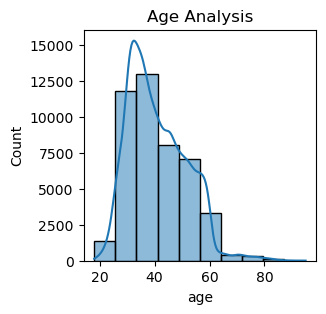

In [73]:
plt.figure(figsize=(3,3))
sns.histplot(X['age'], bins=10, kde=True)
plt.title('Age Analysis')

E:\core\miniconda3\envs\nlp\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\core\miniconda3\envs\nlp\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Average Yearly Balance')

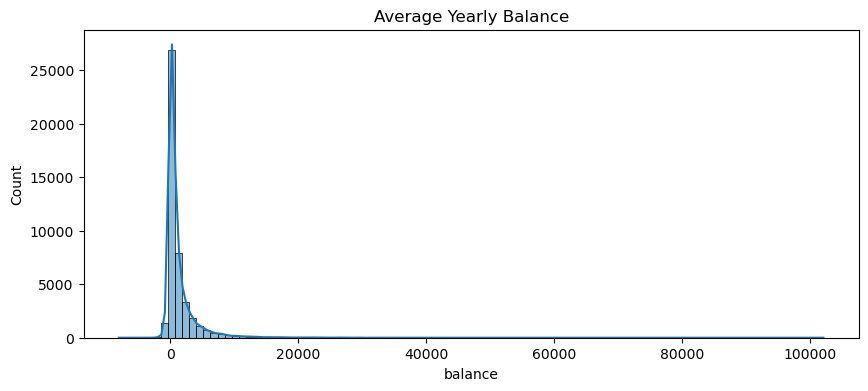

In [97]:
plt.figure(figsize=(10,4))
sns.histplot(X['balance'], bins=100, kde=True)
plt.title('Average Yearly Balance')

E:\core\miniconda3\envs\nlp\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\core\miniconda3\envs\nlp\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Last contact duration, in seconds')

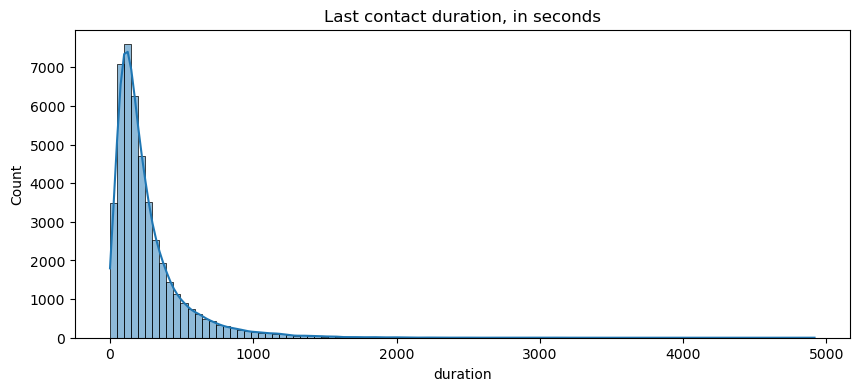

In [103]:
plt.figure(figsize=(10,4))
sns.histplot(X['duration'], bins=100, kde=True)
plt.title('Last contact duration, in seconds')

E:\core\miniconda3\envs\nlp\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\core\miniconda3\envs\nlp\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Number of contacts performed during this campaign')

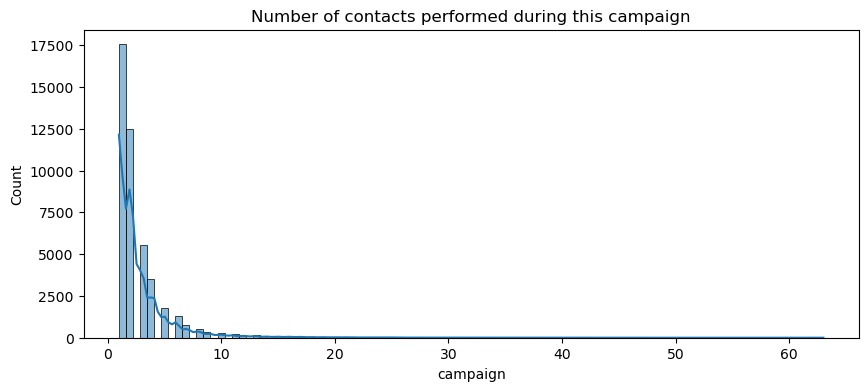

In [98]:
plt.figure(figsize=(10,4))
sns.histplot(X['campaign'], bins=100, kde=True)
plt.title('Number of contacts performed during this campaign')

E:\core\miniconda3\envs\nlp\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\core\miniconda3\envs\nlp\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Number of contacts performed before this campaign')

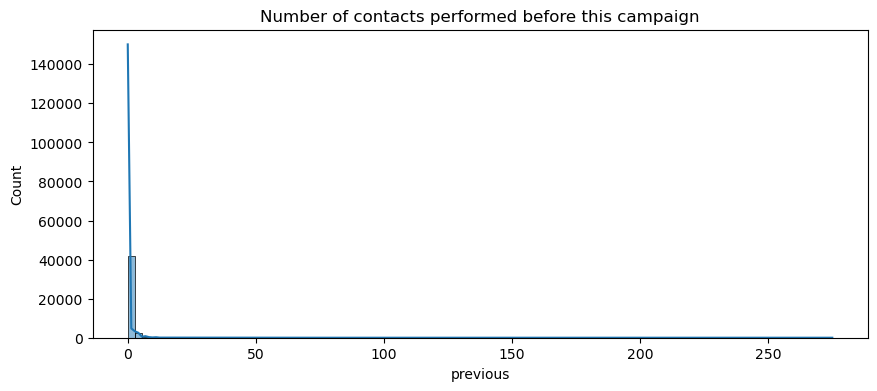

In [105]:
plt.figure(figsize=(10,4))
sns.histplot(X['previous'], bins=100, kde=True)
plt.title('Number of contacts performed before this campaign')

E:\core\miniconda3\envs\nlp\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\core\miniconda3\envs\nlp\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Number of days that passed by after the client.')

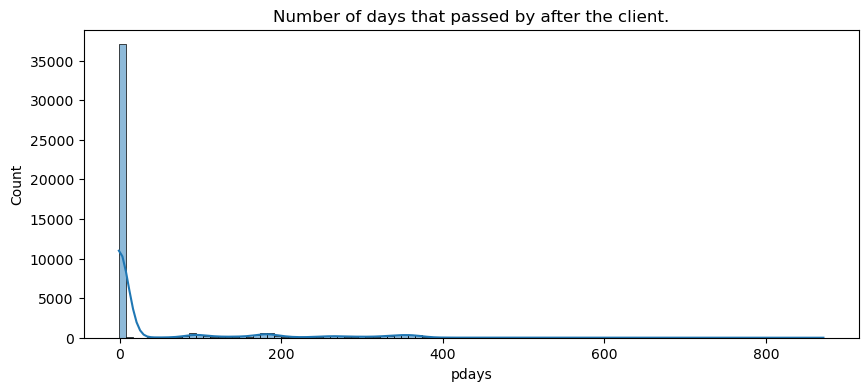

In [112]:
plt.figure(figsize=(10,4))
sns.histplot(X['pdays'], bins=100, kde=True)
plt.title('Number of days that passed by after the client.')

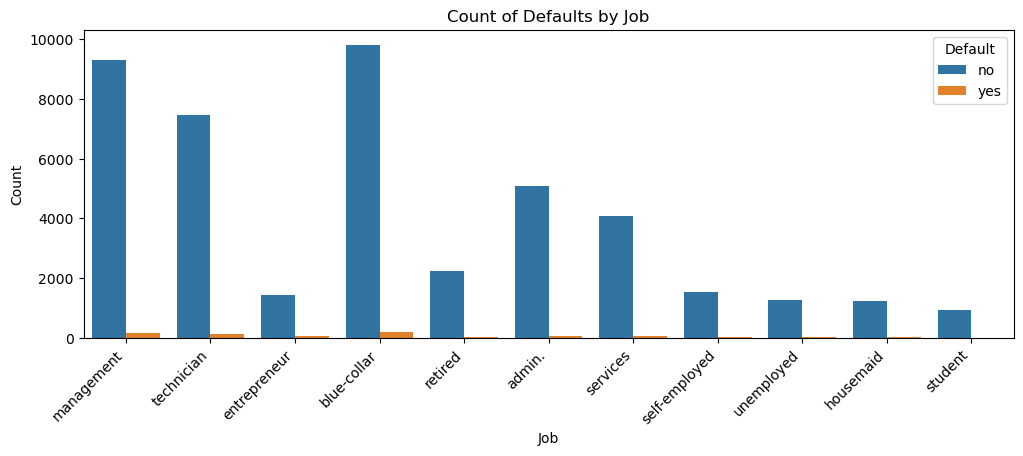

In [129]:
plt.figure(figsize=(12, 4))
sns.countplot(x='job', hue='default', data=X)
plt.title('Count of Defaults by Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Default', loc='upper right')
plt.show()

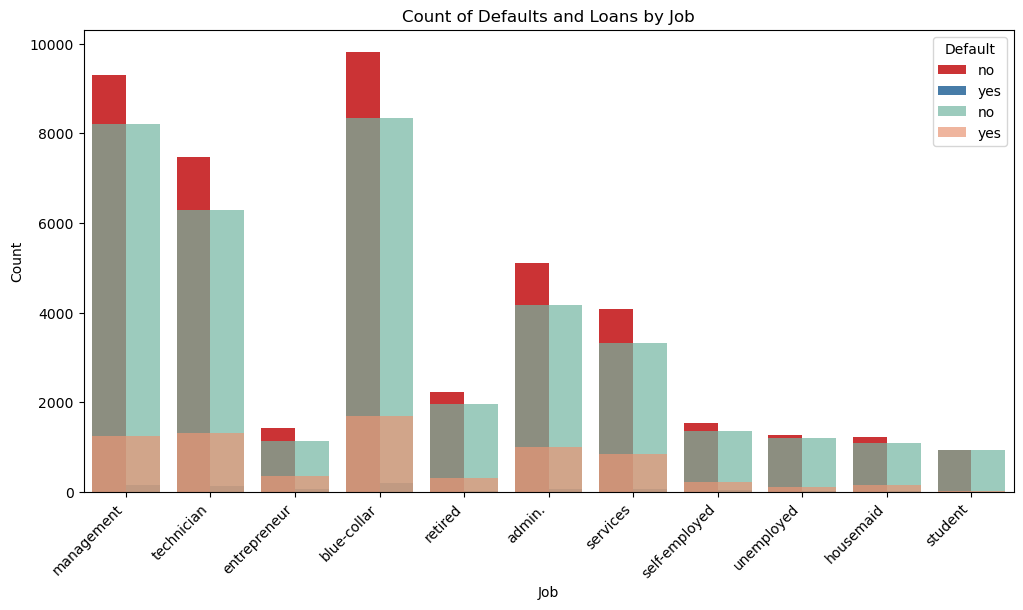

In [143]:
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='default', data=X, hue_order=['no', 'yes'], palette='Set1', dodge=True)
sns.countplot(x='job', hue='loan', data=X, hue_order=['no', 'yes'], palette='Set2', dodge=False, alpha=0.7)
plt.title('Count of Defaults and Loans by Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Default', loc='upper right')
plt.show()

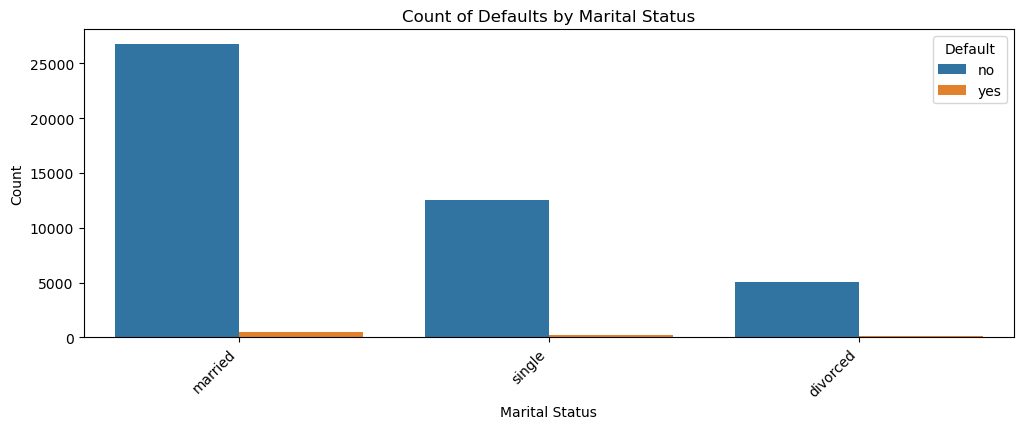

In [146]:
plt.figure(figsize=(12, 4))
sns.countplot(x='marital', hue='default', data=X)
plt.title('Count of Defaults by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Default', loc='upper right')
plt.show()

## Feature Engineering

In [170]:
X['loan'] = X['loan'].map({'yes':1, 'no':0})

In [173]:
X['housing'] = X['housing'].map({'yes':1, 'no':0})
X['default'] = X['default'].map({'yes':1, 'no':0})

In [176]:
X['job'] = X['job'].map({'management':0, 'technician':1, 'entrepreneur':2, 'blue-collar':3,
               'retired':4, 'admin.':5, 'services':6, 'self-employed':7, 'unemployed':8,
               'housemaid':9, 'student':10})

In [180]:
X['marital'] = X['marital'].map({'married':0, 'single':1, 'divorced':2})
X['education'] = X['education'].map({'tertiary':0, 'secondary':1, 'primary':2})
X['month'] = X['month'].map({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2,
               'mar':3, 'apr':4, 'sep':9})

In [181]:
X.head()

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous
0,58,0,0,0,0,2143,1,0,5,5,261,1,-1,0
1,44,1,1,1,0,29,1,0,5,5,151,1,-1,0
2,33,2,0,1,0,2,1,1,5,5,76,1,-1,0
3,47,3,0,1,0,1506,1,0,5,5,92,1,-1,0
4,33,3,1,1,0,1,0,0,5,5,198,1,-1,0


In [213]:
y['subscribed'] = y['subscribed'].map({'no':0, 'yes':1})

In [214]:
y.head()

,subscribed
0,0
1,0
2,0
3,0
4,0


## Correlation Analysis

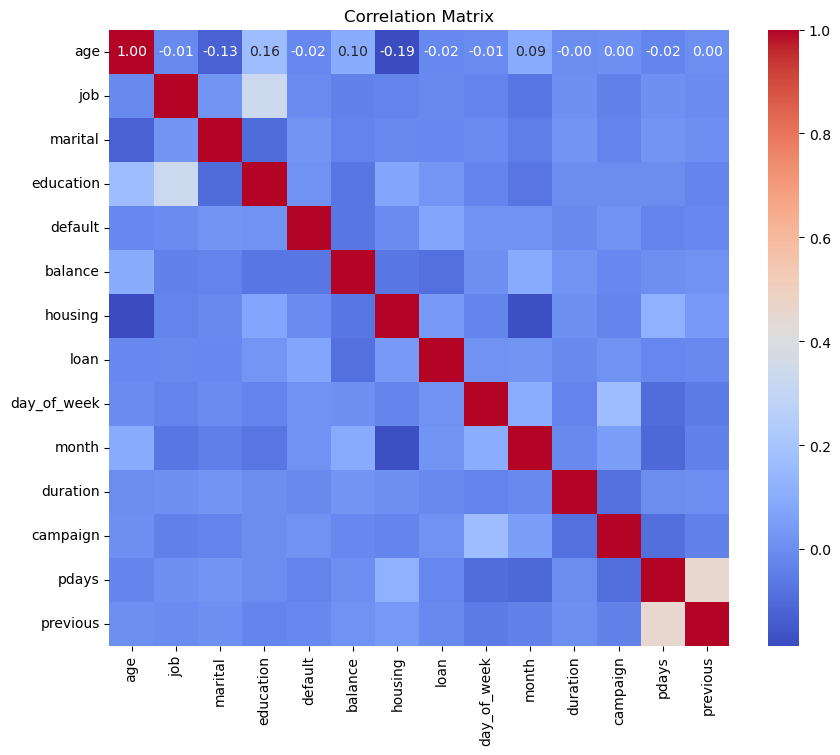

In [184]:
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [187]:
X.describe()

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,3.151512,0.513238,0.857336,0.018027,1362.272058,0.555838,0.160226,15.806419,6.144655,258.163080,2.763841,40.197828,0.580323
std,10.618762,2.680074,0.692948,0.652218,0.133049,3044.765829,0.496878,0.366820,8.322476,2.408034,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000,8.000000,5.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,3.000000,0.000000,1.000000,0.000000,448.000000,1.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,5.000000,1.000000,1.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,10.000000,2.000000,2.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,275.000000


In [189]:
from scipy.stats import zscore

test = X[(zscore(X['balance'])<3) & (zscore(X['balance'])>-3)]

test.describe()

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous
count,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000
mean,40.882382,3.160505,0.514618,0.861647,0.018284,1084.544483,0.558112,0.162034,15.803558,6.128345,258.057662,2.765506,40.244614,0.579544
std,10.596139,2.675961,0.693725,0.651217,0.133977,1721.069271,0.496617,0.368486,8.328517,2.397347,257.439656,3.100462,100.268044,2.310143
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,68.000000,0.000000,0.000000,8.000000,5.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,3.000000,0.000000,1.000000,0.000000,431.000000,1.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,5.000000,1.000000,1.000000,0.000000,1347.000000,1.000000,0.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,10.000000,2.000000,2.000000,1.000000,10483.000000,1.000000,1.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,275.000000


Text(0.5, 1.0, 'Average Yearly Balance')

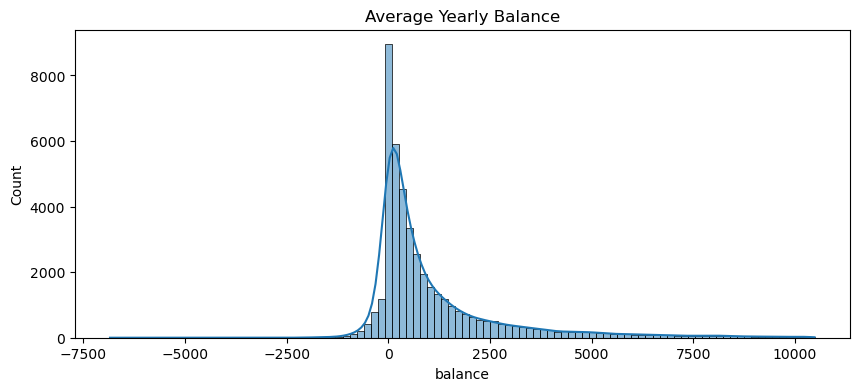

In [190]:
plt.figure(figsize=(10,4))
sns.histplot(test['balance'], bins=100, kde=True)
plt.title('Average Yearly Balance')

## Machine Learning

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [217]:
model = RandomForestClassifier()

In [218]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [219]:
y_pred = model.predict(X_test)

In [220]:
f1score = f1_score(y_test, y_pred)
print(f'F1-score: {f1score:.2f}')

F1-score: 0.46


In [221]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


In [223]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7973
           1       0.62      0.37      0.46      1070

    accuracy                           0.90      9043
   macro avg       0.77      0.67      0.70      9043
weighted avg       0.88      0.90      0.89      9043



In [226]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day_of_week', 'month', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')

In [224]:
model.feature_importances_

array([0.11416479, 0.05409823, 0.02164672, 0.02334363, 0.00214118,
       0.11852265, 0.02988117, 0.01065173, 0.10620997, 0.08849883,
       0.2984257 , 0.04129142, 0.06057366, 0.03055032])

In [227]:
important_features = ['age', 'job', 'balance', 'day_of_week', 'month', 'duration', 'pdays']

In [228]:
# Hyperparameter Tuning 
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'n_estimators': [50, 100, 200, 500, 1000], 'max_depth': [None, 5, 10, 20, 40], 'min_samples_split': [2, 5, 10], 'min_samples_leaf':[1,2,4], 'bootstrap':[True, False]}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, 
                                   scoring='accuracy', cv=5, random_state=42, verbose=2, n_jobs=-1)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [229]:
best_model

RandomForestClassifier(bootstrap=False, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

In [233]:
model2 = RandomForestClassifier(bootstrap=False, min_samples_leaf=2, min_samples_split=5, n_estimators=200)

model2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

In [234]:
y_pred = model2.predict(X_test)

f1score = f1_score(y_test, y_pred)
print(f'F1-score: {f1score:.2f}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

F1-score: 0.48
Accuracy: 0.90


### Choosing Better Features as per RFC

In [235]:
model.feature_importances_

array([0.11422856, 0.05421768, 0.02146629, 0.02322979, 0.00212881,
       0.12028166, 0.02830899, 0.01108445, 0.10573847, 0.08839383,
       0.29863469, 0.03986064, 0.0611307 , 0.03129544])

In [236]:
model2.feature_importances_

array([0.10135855, 0.04481371, 0.01773497, 0.01802634, 0.00116373,
       0.10098474, 0.03557195, 0.0089155 , 0.09835884, 0.09301053,
       0.34263048, 0.03316899, 0.07188687, 0.0323748 ])

In [238]:
X_test = X[important_features]

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X_test, y, test_size=0.2)

In [240]:
model3 = RandomForestClassifier(bootstrap=False, min_samples_leaf=2, min_samples_split=5, n_estimators=200)

model3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

In [241]:
y_pred = model3.predict(X_test)

f1score = f1_score(y_test, y_pred)
print(f'F1-score: {f1score:.2f}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

F1-score: 0.51
Accuracy: 0.91


### SOMEHOW WE GET BETTER ACCURACY WITH RFC IMPORTANT FEATURES